In [8]:
# !pip install binance-connector
import logging
from binance.spot import Spot as Client
from binance.lib.utils import config_logging

config_logging(logging, logging.DEBUG)

spot_client = Client(base_url="https://testnet.binance.vision")

# logging.info(spot_client.klines("BTCUSDT", "1m"))
# logging.info(spot_client.klines("BTCUSDT", "1h", limit=10))
d = spot_client.klines("BTCUSDT", "15m",limit= 100)
d

2023-03-06 21:59:18.740 UTC DEBUG binance.api: url: https://testnet.binance.vision/api/v3/klines
2023-03-06 21:59:18.743 UTC DEBUG urllib3.connectionpool: Starting new HTTPS connection (1): testnet.binance.vision:443
2023-03-06 21:59:19.692 UTC DEBUG urllib3.connectionpool: https://testnet.binance.vision:443 "GET /api/v3/klines?symbol=BTCUSDT&interval=15m&limit=100 HTTP/1.1" 200 5542
2023-03-06 21:59:19.694 UTC DEBUG binance.api: raw response from server:[[1678050000000,"22408.82000000","22485.85000000","22404.70000000","22484.50000000","71.15128400",1678050899999,"1595610.31956505",1605,"48.61977100","1090371.82855908","0"],[1678050900000,"22484.50000000","22541.20000000","22451.77000000","22461.04000000","93.83112600",1678051799999,"2109302.42093274",2010,"61.90625000","1391708.78046721","0"],[1678051800000,"22460.23000000","22513.82000000","22334.94000000","22363.81000000","90.74756500",1678052699999,"2036113.56482635",2042,"57.05662800","1280025.01001376","0"],[1678052700000,"22363

[[1678050000000,
  '22408.82000000',
  '22485.85000000',
  '22404.70000000',
  '22484.50000000',
  '71.15128400',
  1678050899999,
  '1595610.31956505',
  1605,
  '48.61977100',
  '1090371.82855908',
  '0'],
 [1678050900000,
  '22484.50000000',
  '22541.20000000',
  '22451.77000000',
  '22461.04000000',
  '93.83112600',
  1678051799999,
  '2109302.42093274',
  2010,
  '61.90625000',
  '1391708.78046721',
  '0'],
 [1678051800000,
  '22460.23000000',
  '22513.82000000',
  '22334.94000000',
  '22363.81000000',
  '90.74756500',
  1678052699999,
  '2036113.56482635',
  2042,
  '57.05662800',
  '1280025.01001376',
  '0'],
 [1678052700000,
  '22363.81000000',
  '22571.68000000',
  '21437.96000000',
  '22485.77000000',
  '114.70409700',
  1678053599999,
  '2570501.62084850',
  2596,
  '82.01298300',
  '1838866.67338166',
  '0'],
 [1678053600000,
  '22485.77000000',
  '22571.68000000',
  '22409.37000000',
  '22439.53000000',
  '91.26184900',
  1678054499999,
  '2048595.41104772',
  1857,
  '53.

In [24]:
import pandas as pd
data = pd.DataFrame(d)
data.rename(columns={0:'Kline_open_time',1: 'Open_price',2:'High_price',3:'Low_price',4:'Close_price',5:'Volume',6:'Kline_Close_time',7:'Quote_asset_volume',8:'Number_of_trades',9:'Taker_buy_base_asset_volume',10:'Taker_buy_quote_asset_volume'},
          inplace=True, errors='raise')
data

data = data.astype(float)

2023-03-06 22:16:35.728 UTC DEBUG matplotlib.font_manager: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-03-06 22:16:35.729 UTC DEBUG matplotlib.font_manager: findfont: score(FontEntry(fname='C:\\Users\\default.LAPTOP-ACER\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2023-03-06 22:16:35.730 UTC DEBUG matplotlib.font_manager: findfont: score(FontEntry(fname='C:\\Users\\default.LAPTOP-ACER\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-03-06 22:16:35.731 UTC DEBUG matplotlib.font_manager: findfont: score(FontEntry(fname='C:\\Users\\default.LAPTOP-ACER\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOne

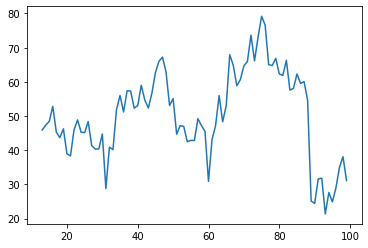

In [27]:
import numpy as np
from matplotlib import pyplot as plt


def get_RSI(data, n=14):
    # Calculate price change
    delta = data['Close_price'].diff()

    # Get upward and downward price changes
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate average gain and loss over n periods
    avg_gain = gain.rolling(n).mean()
    avg_loss = loss.rolling(n).mean()

    # Calculate the relative strength
    RS = avg_gain / avg_loss

    # Calculate the RSI
    RSI = 100 - (100 / (1 + RS))

    return RSI

# Calculate RSI for the data
data['RSI'] = get_RSI(data)

# Print the RSI values
# print(data['RSI'])


plt.plot(data.index, data['RSI'])
plt.show()